# CELL 1: Import Libraries

In [1]:
%pip install -q pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# CELL 1: Import Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


# CELL 2: Load Datasetlen(df)}")

In [5]:
# Make sure 'CHATGPT.csv' is in the same folder as this code
df = pd.read_csv('CHATGPT.csv')

# Drop any empty rows just in case
df.dropna(subset=['Review', 'label'], inplace=True)

# Show the first 5 rows
print("Data Loaded Successfully.")
print(df.head())
print(f"\nTotal Reviews: {len(df)}")

Data Loaded Successfully.
                                              Review     label
0  up to this point i ’ ve mostly been using chat...  NEGATIVE
1  i ’ ve been a user since it ’ s initial roll o...  NEGATIVE
2  this app would almost be perfect if it wasn ’ ...  NEGATIVE
3  i recently downloaded the app and overall, it'...  POSITIVE
4  i appreciate the devs implementing siri suppor...  NEGATIVE

Total Reviews: 2249


# CELL 3: Define Pre-processing Function

In [6]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # 3. Remove URLs (http://...)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # 4. Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)
    
    # 5. Remove Punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # 6. Remove Newlines
    text = re.sub(r'\n', '', text)
    
    return text

print("Pre-processing function defined.")

Pre-processing function defined.


# CELL 4: Apply Pre-processing

In [7]:
# Apply the clean_text function to the 'Review' column
df['cleaned_review'] = df['Review'].apply(clean_text)

# Check the difference
print("Pre-processing Complete!")
print("\nOriginal Review (Example):")
print(df['Review'].iloc[0][:100]) 
print("\nCleaned Review (Example):")
print(df['cleaned_review'].iloc[0][:100])

Pre-processing Complete!

Original Review (Example):
up to this point i ’ ve mostly been using chatgpt on my windows desktop using google chrome. while i

Cleaned Review (Example):
up to this point i ’ ve mostly been using chatgpt on my windows desktop using google chrome while it


# CELL 5: Feature Engineering & Train-Test Split

In [8]:

# Initialize TF-IDF Vectorizer
# max_features=3000 means we only keep the top 3,000 most important words
# stop_words='english' removes common words like "the", "and", "is"
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

# Transform the text data into numbers
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']

# Split data: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Split Successfully.")
print(f"Training set size: {X_train.shape[0]} reviews")
print(f"Testing set size: {X_test.shape[0]} reviews")

Data Split Successfully.
Training set size: 1799 reviews
Testing set size: 450 reviews


# CELL 6: Model Training

In [10]:

# 1. Naive Bayes (MNB)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Trained.")

# 2. Logistic Regression (LR)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Trained.")

# 3. Support Vector Machine (SVM)
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Trained.")

Naive Bayes Trained.
Logistic Regression Trained.
SVM Trained.


# CELL 7: Evaluation & Visualization

Naive Bayes Accuracy: 0.7622
Logistic Regression Accuracy: 0.7578
SVM Accuracy: 0.8022


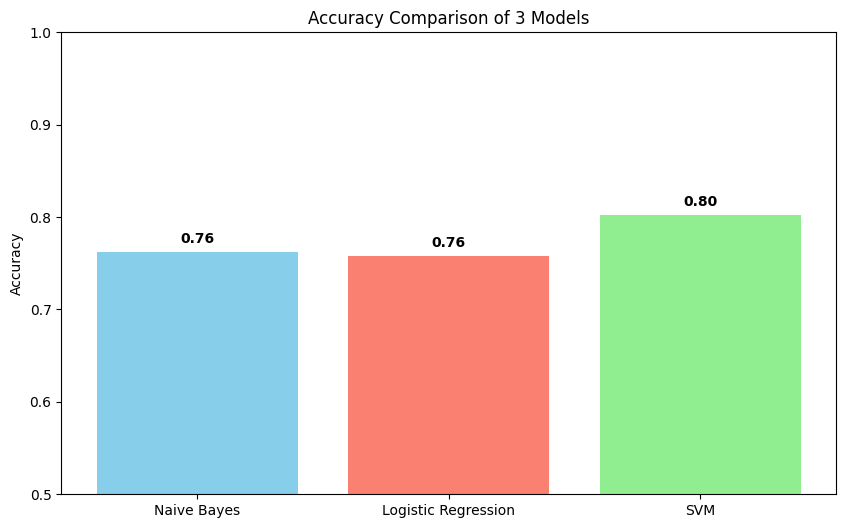

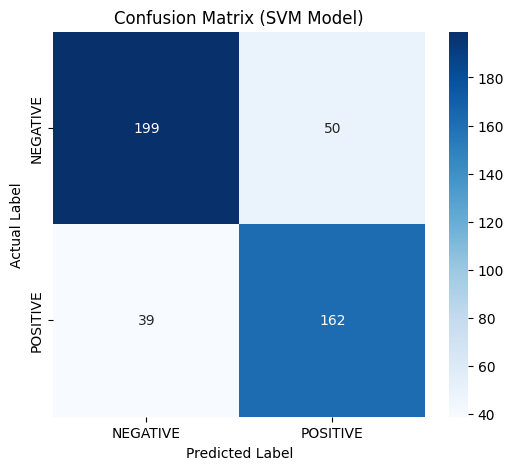

C:\Users\mmk11\AppData\Local\Temp\ipykernel_48300\2468356375.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


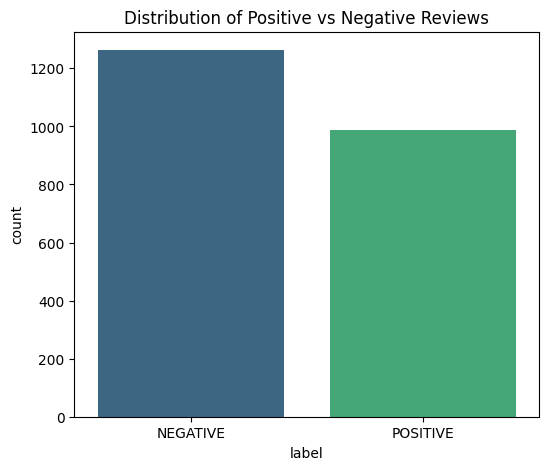

In [11]:

# Calculate Accuracies
nb_acc = accuracy_score(y_test, nb_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)

print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")

# --- GRAPH 1: Model Comparison Bar Chart ---
plt.figure(figsize=(10, 6))
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [nb_acc, lr_acc, svm_acc]
colors = ['skyblue', 'salmon', 'lightgreen']
plt.bar(models, accuracies, color=colors)
plt.ylim(0.5, 1.0)
plt.title('Accuracy Comparison of 3 Models')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# --- GRAPH 2: Confusion Matrix (For the best model, likely SVM or LR) ---
# We will use SVM for the confusion matrix as an example
cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix (SVM Model)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# --- GRAPH 3: Label Distribution (EDA) ---
plt.figure(figsize=(6, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Positive vs Negative Reviews')
plt.show()

# CELL 8: Interactive Demonstration


In [12]:
print("\n--- SENTIMENT ANALYSIS DEMO ---")

# Define a list of test reviews
test_reviews = [
    "I absolutely love this app, it helps me so much with my work!",
    "This update is terrible, it keeps crashing and is useless.",
    "It's okay, not great but not bad either."
]

# Process and Predict
print(f"{'Review':<60} | {'Prediction'}")
print("-" * 80)

for review in test_reviews:
    # 1. Clean
    cleaned = clean_text(review)
    # 2. Vectorize
    vec = vectorizer.transform([cleaned])
    # 3. Predict (Using SVM as it's often the best)
    prediction = svm_model.predict(vec)[0]
    
    print(f"{review:<60} | {prediction}")


--- SENTIMENT ANALYSIS DEMO ---
Review                                                       | Prediction
--------------------------------------------------------------------------------
I absolutely love this app, it helps me so much with my work! | POSITIVE
This update is terrible, it keeps crashing and is useless.   | NEGATIVE
It's okay, not great but not bad either.                     | POSITIVE
